<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/02FashionMNISTData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import torchvision.utils as vutils

In [2]:
class FashionMNIST(torch.nn.Module):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28), root='data', num_workers=4):
        super().__init__()
        self.batch_size = batch_size
        self.resize = resize
        self.root = root # 'root' directory for dataset download
        self.num_workers = num_workers # Number of subprocesses for data loading

        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                  'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]

    def get_dataloader(self, train):
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                           num_workers=self.num_workers)

    def train_dataloader(self):
        return self.get_dataloader(True)

    def val_dataloader(self):
        return self.get_dataloader(False)

    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
        # Using the re-implemented show_images function
        show_images(X.squeeze(1), nrows, ncols, titles=labels)

In [3]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy())
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

In [4]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [5]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [6]:
X, y = next(iter(data.get_dataloader(train=True)))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


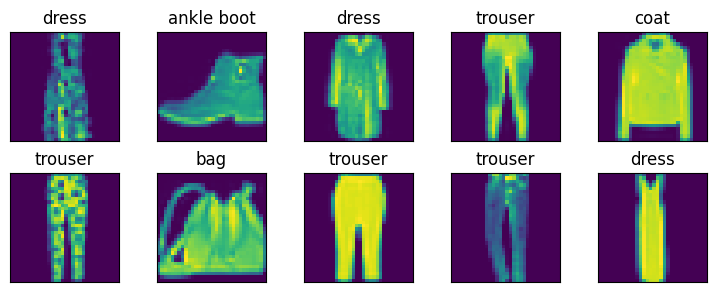

In [7]:
X_batch, y_batch = next(iter(data.get_dataloader(train=True)))
data.visualize(batch=(X_batch, y_batch), nrows=2, ncols=5)